In [ ]:
# 1. model
# 2. experiment -> data
# 3. based on the data, get the parameters of the model

# assume model of metal spring, it has initial length and stiffness, initially we don't
# know anything. What could be meaningful ranges of these parameters?
# The class is thinking.
# From mathematical point of view form -infinity, to + infinity is reasonable.
# From physical point of view it is completely stupid.

# What would be the min limit of length of spring.

# This is called prior knowledge.

# Smallest would be two atoms in molecule. Largest - observable universe.

In [26]:
# Lets write a model for the spring elongation when it is
# under the influence of the external force

# Deterministic model - mathematical relation

# in spring case it is linear relation: y = k * x + b

# k and b mathematically can be from -inf to inf, but physically they are limited

# These physical limits help us a lot to define priors, or prior
# knowledge of meaningful parameter limits.

# for spring k is the stiffness coefficient and b is initial length of the spring.
# another thing that helps a lot is that these parameters of the model
# do have units of measurement.

# y = k * x + b
# [length] = [stiffness^-1] * [force] + [initial length]
# SI: [m] = [m / N] * [N] + [m]

# prior knowlegde helps to answer what would be meaningful parameters limits.

# we don't know paramters unless we do the experiment, but prior knowledge helps
# to be more confident in experiment outcome if it is within the range we expected.

# what is x?

# mathematically it is argument of function.

# y = k * x + b; (k, b) are constants of the spring (of law of nature)
# x is the argument of the function.
# y = f(x, [k, b])

# when we do experiment, what we want to find?
# The k and b parameter values, and also their uncertainties.

# Basically we will be fitting the line and extimating paramters of it and their
# uncertainty.

# Is understanting of the model parameter space.
# How many free (the parameters we can adjust) paramters this model has?
# Two parameters, k and b. What are their limits?
# (k, b) is 2D parameter space - a plane.

# if model has only one parameter, the parameter space is a line.
# if model has three parameters, the parameter space is 3D.


class Model:

    def __init__(self, k, b):
        self.k = k
        self.b = b

    def call(self, x):
        '''
        For given input force x [N], return the length [m] of the spring
        '''
        y = self.k * x + self.b
        return y


k_true = 2    # [m/N] stiffness^-1 of spring
b_true = 3    # [m]
model_true = Model(k=k_true, b=b_true)

In [50]:
# Experiment part: put spring in some aparatus and
# and start measurement sequence: apply the force, measure length; repeat.
import numpy as np
import pandas as pd


class Experiment:

    def __init__(self, spring):
        self.spring = spring
        self.force_list = []
        self.length_list = []

    def run(self, force_start, force_stop, num_steps):
        for force in np.linspace(force_start, force_stop, num_steps):
            length = self.spring.call(force)
            self.force_list.append(force)
            self.length_list.append(length)

    def save(self, file_name):
        data = {
            'force': self.force_list,
            'length': self.length_list,
        }
        df = pd.DataFrame(data)
        df.to_csv(file_name, index=False)

# For now the experiment is ideal, it does not introduce any measurement
# uncertainties
experiment = Experiment(spring=model_true)

experiment.run(
    force_start=50,
    force_stop=100,
    num_steps=11
)

experiment.save('results.csv')

In [ ]:
# Based on the data, get the parameters of the model
# get: estimate, fit, infer (statistical inference), extract information

# Do we fit model to data, or data to model?
# we fit model to data, because any data is random things frozen in time converted to bits


# let's write code that will allow us to do model parameter inference

# good model fit should go through the data points.



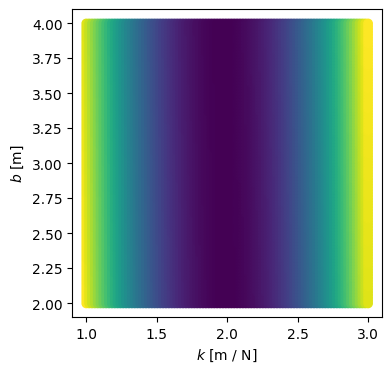

In [74]:
import matplotlib.pyplot as plt

class GridSearch:

    def __init__(self, data, model):
        self.data = data
        self.model = model
        self.k_list = []
        self.b_list = []
        self.loss_list = []

    def run(self, k_min, k_max, b_min, b_max, num_k, num_b):
        for k in np.linspace(k_min, k_max, num_k):
            for b in np.linspace(b_min, b_max, num_b):

                # compute the goodness of fit or badness of fit
                # loss = data - model
                self.model.k = k
                self.model.b = b
                length_data = self.data.length
                length_model = self.model.call(self.data.force)
                delta = length_data - length_model
                loss = np.sum(delta**2)

                self.k_list.append(k)
                self.b_list.append(b)
                self.loss_list.append(loss)

    def plot(self):
        plt.figure(figsize=(4, 4))
        plt.scatter(self.k_list, self.b_list, c=self.loss_list)
        plt.xlabel('$k$ [m / N]')
        plt.ylabel('$b$ [m]')
        plt.savefig('grid_search.png', dpi=100)


df_data = pd.read_csv('results.csv')
model_trial = Model(k=0, b=0)

grid_search = GridSearch(
    data=df_data,
    model=model_trial,
)

grid_search.run(
    k_min=1,
    k_max=3,
    b_min=2,
    b_max=4,
    num_k=100,
    num_b=100,
)

grid_search.plot()


In [65]:
df_data

,force,length
0,50.0,103.0
1,55.0,113.0
2,60.0,123.0
3,65.0,133.0
4,70.0,143.0
5,75.0,153.0
6,80.0,163.0
7,85.0,173.0
8,90.0,183.0
9,95.0,193.0


In [51]:
!ls

results.csv  sample_data


In [52]:
!pwd

/content


In [43]:
x = [1, 2, 3, 4, 'a', 'b']



y = {
    'vardas': 'Petras',
    'pavarde': 'ajshj',
    123: 4544,
    (1, 2): 'value of tuple key',
    [3, 1]: 'can we use list as a key?'
}

y[(1, 2)]

TypeError: unhashable type: 'list'

In [49]:
data = {
    'x': np.array([1, 2, 3]),
    'y': np.array([2, 9, 7]),
}


df = pd.DataFrame(data)
df

,x,y
0,1,2
1,2,9
2,3,7
